# Sesión 5 y 6: Live session: apoyo para Laboratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/double-thinker/datasets/main/example_students.csv")

In [3]:
df.head()

,progenitor1,progenitor2,nota
0,alto,bajo,B
1,alto,alto,A
2,alto,medio,A
3,medio,alto,B
4,alto,bajo,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   progenitor1  500 non-null    object
 1   progenitor2  500 non-null    object
 2   nota         500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


<AxesSubplot:>

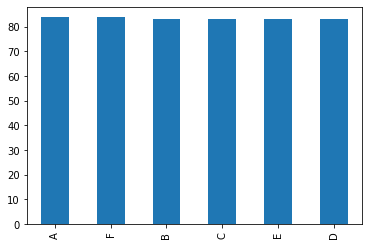

In [5]:
df.nota.value_counts().plot.bar()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns=["nota"])
y = df.nota

In [12]:
train_test_split?

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
model = DecisionTreeClassifier()

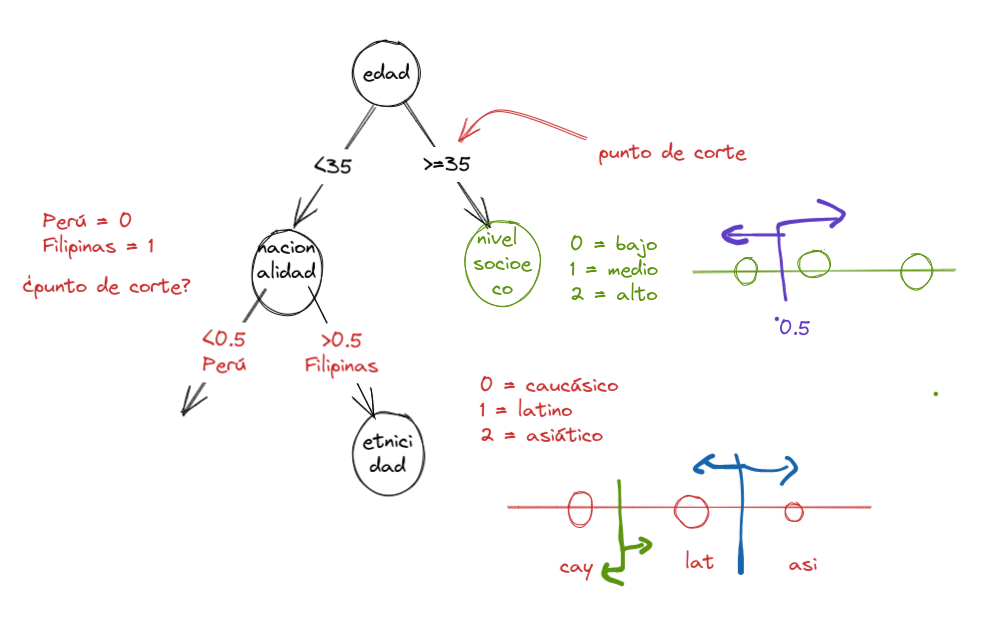

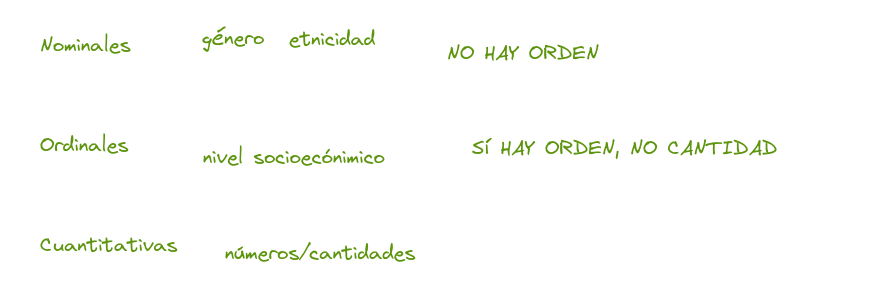

# Codificación de variables

In [22]:
# A mano, más largo. Sirve si hay pocas opciones y variables
df.progenitor1.replace({
    "bajo": 0,
    "medio": 1,
    "alto": 2
})

0      2
1      2
2      2
3      1
4      2
      ..
495    0
496    0
497    0
498    2
499    2
Name: progenitor1, Length: 500, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [24]:
oe = OrdinalEncoder()

In [26]:
X_train

,progenitor1,progenitor2
126,bajo,bajo
335,medio,bajo
354,medio,medio
323,medio,medio
74,bajo,bajo
...,...,...
488,bajo,bajo
235,medio,medio
381,bajo,bajo
231,alto,medio


In [25]:
oe.fit_transform(X_train)

array([[1., 1.],
       [2., 1.],
       [2., 2.],
       [2., 2.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [2., 2.],
       [0., 0.],
       [2., 2.],
       [2., 0.],
       [0., 1.],
       [2., 1.],
       [0., 2.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 2.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [1., 2.],
       [0., 0.],
       [1., 2.],
       [2., 1.],
       [2., 1.],
       [2., 0.],
       [2., 2.],
       [2., 1.],
       [2., 1.],
       [1., 0.],
       [1., 1.],
       [2., 0.],
       [1., 0.],
       [0., 0.],
       [2., 0.],
       [0., 2.],
       [0., 0.],
       [2., 2.],
       [1., 0.],
       [2., 0.],
       [1., 2.],
       [2., 2.],
       [0., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 2.],
       [0., 1.],
       [2., 1.],
       [2., 0.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [0., 1.],
       [2., 0.],
       [2., 0.

Nota: Os aconsejo que aprendáis a usar Pipeline. Lo veremos en otra sesión

Usar un encoder **NO GARANTIZA** que la codificación esté bien. En este caso no se respeta la ordinalidad

In [27]:
# Fijar el "orden" de las categorías
valores = ["bajo", "medio", "alto"]

In [33]:
# Ponemos dos veces valores porque hay dos columnas
oe = OrdinalEncoder(categories=[valores, valores])

In [32]:
X_train = oe.fit_transform(X_train)

In [36]:
X_test = oe.fit_transform(X_test)

##  Ejemplo de OHE

In [39]:
ohe = OneHotEncoder()
ohe.fit_transform(X)

<500x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

Conseguimos 6 columnas:

In [42]:
ohe.get_feature_names_out()

array(['progenitor1_alto', 'progenitor1_bajo', 'progenitor1_medio',
       'progenitor2_alto', 'progenitor2_bajo', 'progenitor2_medio'],
      dtype=object)

## Entrenamos

In [43]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

¡¡Funciona!!

## Evaluación

**AVISO A NAVEGANTES**: Los encodings y preprocesamientos **se aplican a train y test por igual**

**AVISO A NAVEGANTES II**: ¿Qué pasa si hago el encoding con todo y luego hago la división? En algunos casos todo irá OK. En otros tendrás un problema de **data leaking**

Ej: si normalizo usando la **media de todo el dataset** estoy rompiendo la división train/test. Es decir, estoy **filtrando información**

Esto se soluciona:

1. Teniendo mucho cuidado y sabiendo lo que haces.
2. Usando Pipeline(s)

### Calcular el "hat" o "predict" del test


In [44]:
y_test_hat = model.predict(X_test)

In [45]:
y_test

168    D
432    F
149    F
377    D
139    D
      ..
222    F
178    B
431    A
209    A
319    D
Name: nota, Length: 100, dtype: object

In [46]:
y_test_hat

array(['C', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'F', 'E', 'A', 'C', 'B',
       'C', 'C', 'C', 'E', 'D', 'E', 'B', 'C', 'E', 'E', 'A', 'E', 'C',
       'C', 'C', 'E', 'E', 'A', 'F', 'C', 'C', 'A', 'B', 'C', 'C', 'C',
       'B', 'E', 'D', 'B', 'B', 'A', 'B', 'E', 'C', 'C', 'A', 'B', 'C',
       'F', 'B', 'E', 'C', 'E', 'C', 'E', 'E', 'E', 'C', 'A', 'A', 'C',
       'D', 'A', 'D', 'E', 'F', 'E', 'C', 'B', 'A', 'B', 'F', 'F', 'A',
       'B', 'C', 'C', 'C', 'A', 'D', 'E', 'D', 'A', 'D', 'A', 'C', 'C',
       'C', 'E', 'E', 'E', 'F', 'C', 'A', 'A', 'E'], dtype=object)

In [47]:
y_test == y_test_hat

168    False
432     True
149     True
377    False
139    False
       ...  
222     True
178    False
431     True
209     True
319    False
Name: nota, Length: 100, dtype: bool

In [48]:
(y_test == y_test_hat).sum()

45

In [49]:
# 100 es el tamaño del test
45 / 100

0.45

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
accuracy_score?

In [52]:
accuracy_score(y_test, y_test_hat)

0.45

In [55]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           A       0.81      0.59      0.68        22
           B       0.33      0.25      0.29        16
           C       0.32      0.85      0.47        13
           D       0.14      0.06      0.08        18
           E       0.32      0.50      0.39        14
           F       1.00      0.53      0.69        17

    accuracy                           0.45       100
   macro avg       0.49      0.46      0.43       100
weighted avg       0.51      0.45      0.44       100



In [60]:
cm = confusion_matrix(y_test, y_test_hat, labels=["A", "B", "C", "D", "E", "F"])

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

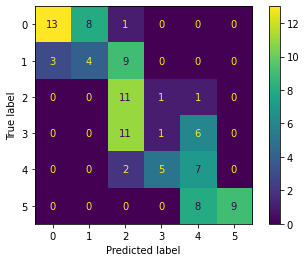

In [65]:
ConfusionMatrixDisplay(cm).plot()

In [58]:
13 + 4 + 11 + 1 + 7 + 9 

45